In [1]:
import pandas as pd
import numpy as np
import copy as cp
import matplotlib.pyplot as plt
import seaborn as sns
import os
from natsort import natsorted, ns

In [2]:
"""
A script to evaulate an experiment and create plots accoringly. 

"""

'\nA script to evaulate an experiment and create plots accoringly. \n\n'

In [3]:
#set experiment folder as root dir of this script
experiment_folder = "./data/ege-exp"
os.chdir(experiment_folder)

In [4]:
#set hyperparameters 
num_generations = 100
population_size = 50
num_runs = 2


    

In [5]:
df = pd.DataFrame()
generation_identifiers = {}

for run in sorted(os.listdir(".")):
    if run[0].isdigit():
        #only use the run dirs 
        for filename in natsorted(os.listdir("./"+run+"/generations")):
            _generation_ids = pd.read_csv("./"+run+"/generations/"+filename+"/identifiers.txt", header=None)
            _generation_ids.rename({0: filename}, axis=1, inplace=True)
            if not f"{run}" in generation_identifiers:
                generation_identifiers[f"{run}"] = []
            generation_identifiers[f"{run}"].append(_generation_ids)

In [6]:
#contains the information about the phenotype ID of each generation
generation_identifiers['1'][0].head(3)

,generation_0
0,1
1,2
2,3


In [7]:
runs = {}
for run in range(1, num_runs+1):
    # cause run starts with 1 
    df = pd.DataFrame()
    for generation in range(num_generations):
        df = df.append(generation_identifiers[f"{run}"][generation][f"generation_{generation}"])
    runs[f"{run}"] = df

In [8]:
fitness_values = {}

for run in range(1, num_runs+1):
    fitness_values[f"{run}"] = pd.read_csv(f"{run}/data_fullevolution/fitness.csv", header=None)
    fitness_values[f"{run}"].rename({0:"Individual_ID", 1:"Distance to Target"}, axis=1, inplace=True)

In [9]:
fitness_values

{'1':       Individual_ID  Distance to Target
 0                 1        2.234037e-02
 1                 2        2.243918e-01
 2                 3        7.234794e-07
 3                 4       -3.424910e-08
 4                 5        3.116897e-02
 ...             ...                 ...
 5045           5046        2.662559e-02
 5046           5047        1.470614e-01
 5047           5048       -1.875537e-02
 5048           5049        4.537046e-01
 5049           5050        1.290399e-01
 
 [5050 rows x 2 columns],
 '2':       Individual_ID  Distance to Target
 0                 1            0.143825
 1                 2            0.058982
 2                 3            0.019283
 3                 4            0.059683
 4                 5            0.058213
 ...             ...                 ...
 5045           5046            0.037134
 5046           5047            0.135795
 5047           5048            0.107473
 5048           5049           -0.040619
 5049           505

In [10]:
# no exchange the phenotype ID with the fitness value 
fitness_df = pd.DataFrame()
for _run in runs:
    run_df = runs[_run]
    _fitness_df = cp.deepcopy(run_df.T)
    for gen in run_df.T:
        for index in range(len(run_df.T)):
            individual = int((_fitness_df[gen][int(index)])) - 1
            fitness_value = fitness_values[str(_run)].T[(individual)]['Distance to Target']
            _fitness_df[gen][index] = fitness_value
            
    cur_run = np.ndarray(shape=(len(_fitness_df)))
    cur_run.fill(int(_run))
    _fitness_df['run'] = cur_run

    fitness_df = fitness_df.append(_fitness_df)

In [11]:
fitness_df

,generation_0,generation_1,generation_2,generation_3,generation_4,generation_5,generation_6,generation_7,generation_8,generation_9,...,generation_91,generation_92,generation_93,generation_94,generation_95,generation_96,generation_97,generation_98,generation_99,run
0,2.234037e-02,4.052915e-01,0.183732,0.001268,0.020120,0.047133,0.000007,0.051831,1.007302e-01,1.108982e-01,...,0.848054,0.058904,0.228785,0.271451,-0.025720,0.072721,0.034087,0.123653,0.139758,1.0
1,2.243918e-01,2.612714e-03,-0.015829,0.023369,0.023682,0.315646,0.100730,0.037026,6.096349e-09,2.368162e-02,...,0.043774,0.196976,0.094349,0.199736,0.168347,0.089816,0.106226,0.200396,0.203235,1.0
2,7.234794e-07,2.685299e-02,0.076698,0.017237,0.000000,0.100520,0.443449,0.336327,2.340581e-03,2.124078e-02,...,0.223347,0.189879,0.039854,0.207062,0.018375,0.005731,0.166429,0.015084,0.411450,1.0
3,-3.424910e-08,3.596950e-01,0.279090,0.059741,0.342678,0.000056,0.041682,0.150187,2.257641e-01,2.077572e-01,...,0.031575,0.036652,0.412859,0.034589,0.066059,0.310453,0.059537,0.075013,0.265639,1.0
4,3.116897e-02,4.083821e-02,0.198616,0.001842,0.233093,0.021318,0.225764,0.342190,0.000000e+00,9.693758e-08,...,0.196976,0.246668,0.357031,0.848054,0.266334,0.094168,0.232368,0.064012,0.059537,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.310559e-02,8.230761e-08,0.023681,0.019283,0.054093,0.161866,0.070090,0.024250,2.533301e-02,2.816020e-02,...,0.084345,0.233440,0.096242,0.051860,0.216736,0.001315,0.216736,0.259635,0.344669,2.0
96,2.338212e-01,8.483609e-06,0.002775,0.124695,0.070090,0.023838,0.192121,-0.043044,3.347069e-02,2.383741e-02,...,0.091496,0.251453,0.089107,0.011324,0.035201,0.239255,0.198610,0.207882,-0.040619,2.0
97,4.742022e-06,1.421291e-05,0.000014,0.059683,0.031697,0.124695,0.041894,0.023837,2.424972e-02,1.053130e-01,...,0.001418,0.024000,0.005350,0.132267,0.030692,0.198610,0.142611,0.019783,0.078859,2.0
98,2.818116e-06,5.898208e-02,0.037385,0.029446,0.051737,0.273740,-0.004551,0.000001,1.584805e-01,5.028508e-02,...,0.070107,0.122550,0.234724,0.120325,0.000000,0.019866,0.179163,0.060083,1.011496,2.0


In [12]:
mean_dic = {}
std_dic = {}
min_dic = {}
max_dic = {}

for run in range(num_runs):
    for gen in fitness_df:
        if gen != 'run':
            mean_dic[gen] = fitness_df[gen].mean()
            std_dic[gen] = fitness_df[gen].std()
            min_dic[gen] = fitness_df[gen].min()
            max_dic[gen] = fitness_df[gen].max()

        
    
    mean_df = pd.DataFrame(mean_dic, index=[0]).rename({0:"mean"})
    std_df =  pd.DataFrame(std_dic, index=[0]).rename({0:"std"})
    min_df =  pd.DataFrame(min_dic, index=[0]).rename({0:"min"})
    max_df =  pd.DataFrame(max_dic, index=[0]).rename({0:"max"})
    result_df = mean_df.append(std_df).append(min_df).append(max_df).T
    result_df['run'] = run

In [13]:
result_df

,mean,std,min,max,run
generation_0,0.038798,0.140399,-1.037626,0.726230,1
generation_1,0.070061,0.118803,-0.186584,0.532036,1
generation_2,0.090056,0.127381,-0.104613,0.852446,1
generation_3,0.092346,0.129008,-0.238977,0.852446,1
generation_4,0.107029,0.139473,-0.114086,0.852446,1
...,...,...,...,...,...
generation_95,0.123566,0.180852,-1.138156,1.268108,1
generation_96,0.120154,0.179732,-1.138156,1.268108,1
generation_97,0.144404,0.190990,-1.138156,1.268108,1
generation_98,0.156419,0.278586,-0.184966,3.473578,1


In [14]:
result_df = result_df.set_axis([i for i in range(len(result_df))])

In [15]:
result_df.index.name = 'generations'

In [16]:
result_df

,mean,std,min,max,run
generations,,,,,
0,0.038798,0.140399,-1.037626,0.726230,1
1,0.070061,0.118803,-0.186584,0.532036,1
2,0.090056,0.127381,-0.104613,0.852446,1
3,0.092346,0.129008,-0.238977,0.852446,1
4,0.107029,0.139473,-0.114086,0.852446,1
...,...,...,...,...,...
95,0.123566,0.180852,-1.138156,1.268108,1
96,0.120154,0.179732,-1.138156,1.268108,1
97,0.144404,0.190990,-1.138156,1.268108,1


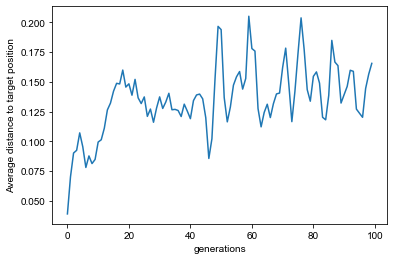

In [17]:
ax = sns.lineplot(x=result_df.T.columns, y=result_df['mean'], markers=True, dashes=True)
ax.set(ylabel='Average distance to target position')
sns.set(rc={'figure.figsize':(15,9)})
ax.figure.savefig("output.png")
plt.show()

<AxesSubplot:xlabel='generations'>

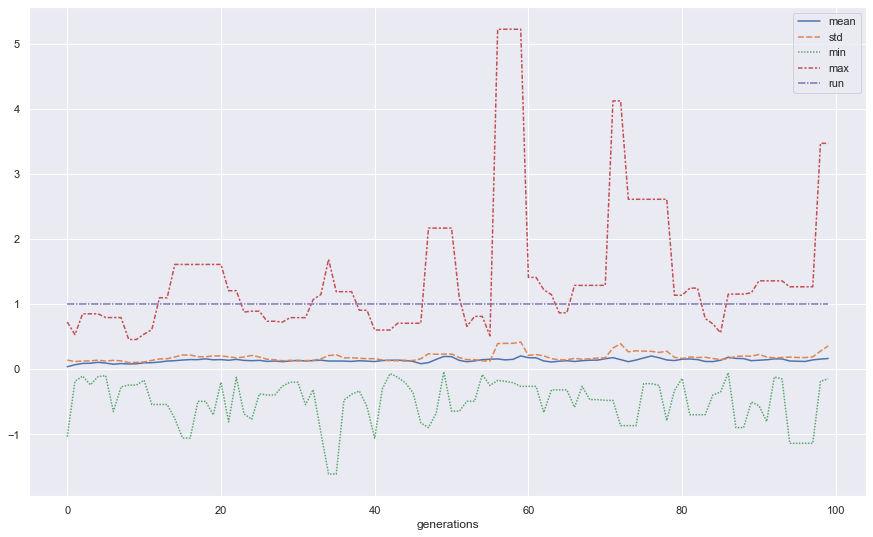

In [18]:
sns.lineplot(data=result_df)

In [19]:
formated_fitness_df = cp.deepcopy(fitness_df)
formated_fitness_df.set_axis([i for i in range(len(fitness_df.T))], axis=1, inplace=True)
formated_fitness_df.rename(columns={len(fitness_df.T)-1 : 'run'}, inplace=True)
formated_fitness_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,run
0,2.234037e-02,4.052915e-01,0.183732,0.001268,0.020120,0.047133,0.000007,0.051831,1.007302e-01,1.108982e-01,...,0.848054,0.058904,0.228785,0.271451,-0.025720,0.072721,0.034087,0.123653,0.139758,1.0
1,2.243918e-01,2.612714e-03,-0.015829,0.023369,0.023682,0.315646,0.100730,0.037026,6.096349e-09,2.368162e-02,...,0.043774,0.196976,0.094349,0.199736,0.168347,0.089816,0.106226,0.200396,0.203235,1.0
2,7.234794e-07,2.685299e-02,0.076698,0.017237,0.000000,0.100520,0.443449,0.336327,2.340581e-03,2.124078e-02,...,0.223347,0.189879,0.039854,0.207062,0.018375,0.005731,0.166429,0.015084,0.411450,1.0
3,-3.424910e-08,3.596950e-01,0.279090,0.059741,0.342678,0.000056,0.041682,0.150187,2.257641e-01,2.077572e-01,...,0.031575,0.036652,0.412859,0.034589,0.066059,0.310453,0.059537,0.075013,0.265639,1.0
4,3.116897e-02,4.083821e-02,0.198616,0.001842,0.233093,0.021318,0.225764,0.342190,0.000000e+00,9.693758e-08,...,0.196976,0.246668,0.357031,0.848054,0.266334,0.094168,0.232368,0.064012,0.059537,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.310559e-02,8.230761e-08,0.023681,0.019283,0.054093,0.161866,0.070090,0.024250,2.533301e-02,2.816020e-02,...,0.084345,0.233440,0.096242,0.051860,0.216736,0.001315,0.216736,0.259635,0.344669,2.0
96,2.338212e-01,8.483609e-06,0.002775,0.124695,0.070090,0.023838,0.192121,-0.043044,3.347069e-02,2.383741e-02,...,0.091496,0.251453,0.089107,0.011324,0.035201,0.239255,0.198610,0.207882,-0.040619,2.0
97,4.742022e-06,1.421291e-05,0.000014,0.059683,0.031697,0.124695,0.041894,0.023837,2.424972e-02,1.053130e-01,...,0.001418,0.024000,0.005350,0.132267,0.030692,0.198610,0.142611,0.019783,0.078859,2.0
98,2.818116e-06,5.898208e-02,0.037385,0.029446,0.051737,0.273740,-0.004551,0.000001,1.584805e-01,5.028508e-02,...,0.070107,0.122550,0.234724,0.120325,0.000000,0.019866,0.179163,0.060083,1.011496,2.0


In [20]:
melted_formated_fitness = formated_fitness_df.melt(id_vars='run')
melted_formated_fitness.rename(columns={'variable':'generation', 'value':'fitness'}, inplace=True)
melted_formated_fitness.head(3)

,run,generation,fitness
0,1.0,0,2.234037e-02
1,1.0,0,2.243918e-01
2,1.0,0,7.234794e-07


<AxesSubplot:xlabel='generation', ylabel='fitness'>

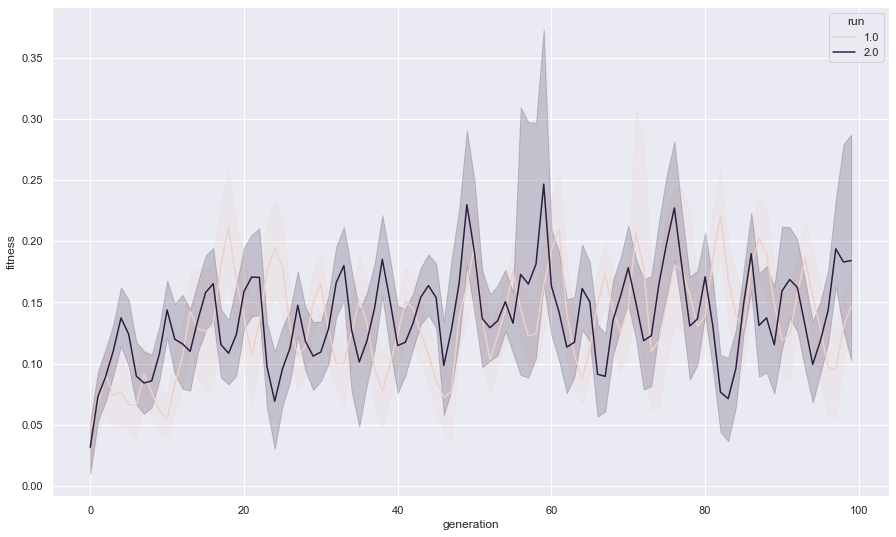

In [21]:
sns.lineplot(data=melted_formated_fitness, x='generation', hue='run', y='fitness')

In [192]:
# TODO: create boxplots over individual performance

In [32]:
fitness_mean = []
fitness_std = []
for i, val in enumerate(generation_identifiers):
    merged_gen = pd.merge(
        left=val,
        right=fitness_run_1,
        how="inner",
        on=None,
        left_on="generation_"+str(i),
        right_on="Individual_ID",
        left_index=False,
        right_index=False,
        sort=True,
        suffixes=("_x", "_y"),
        copy=True,
        indicator=False,
        validate=None,
    )
    gen_mean = merged_gen["Distance to Target"].mean()  
    gen_std = merged_gen["Distance to Target"].std()
    fitness_mean.append(gen_mean)
    fitness_std.append(gen_mean)

NameError: name 'fitness_run_1' is not defined

In [33]:
import matplotlib.pyplot as plt

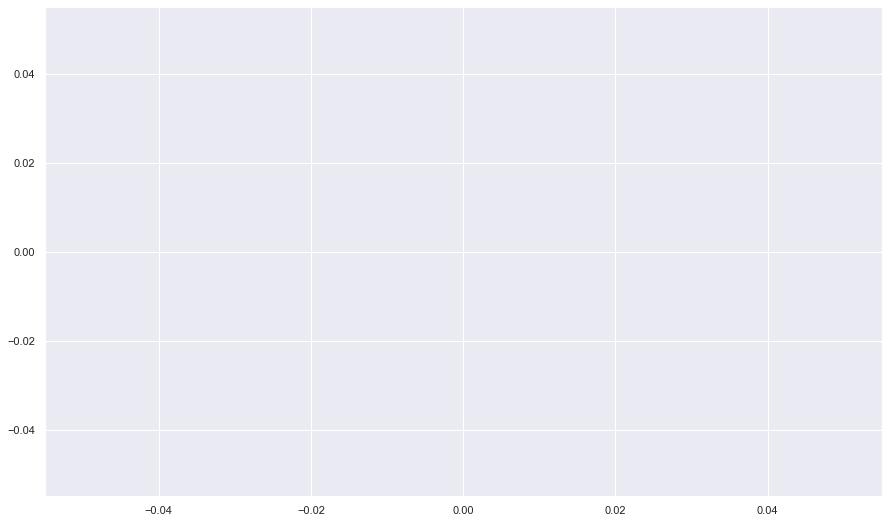

In [34]:
plt.errorbar(list(range(1,len(fitness_mean)+1)), fitness_mean, fitness_std,linestyle='None', marker='^')
plt.show()

In [22]:
max((result_df['max']))

1.4866776258280436

In [28]:
np.where(fitness_values['2']['Distance to Target'] > 1.45)

(array([1004, 1123, 1807, 1987]),)

In [29]:
np.where(fitness_values['1']['Distance to Target'] > 1.45)

(array([ 625, 1704, 2272]),)

In [36]:
run_1_best = fitness_run_1.T[40]
run_2_best = fitness_run_2.T[40]
run_3_best = fitness_run_3.T[40]


NameError: name 'fitness_run_1' is not defined

In [753]:
run_1_best['run'] = 1
run_2_best['run'] = 2
run_3_best['run'] = 3

In [754]:
best_pheno_df = pd.DataFrame(run_1_best).T.append(run_2_best).append(run_3_best)

In [784]:
best_pheno_df = best_pheno_df.reset_index(drop=True)

In [760]:
best = best_pheno_df['Distance to Target'].mean()
std = best_pheno_df['Distance to Target'].std()

In [785]:
fit = best_pheno_df['Distance to Target']
fit

0   -19.078790
1   -20.099967
2   -20.092420
Name: Distance to Target, dtype: float64

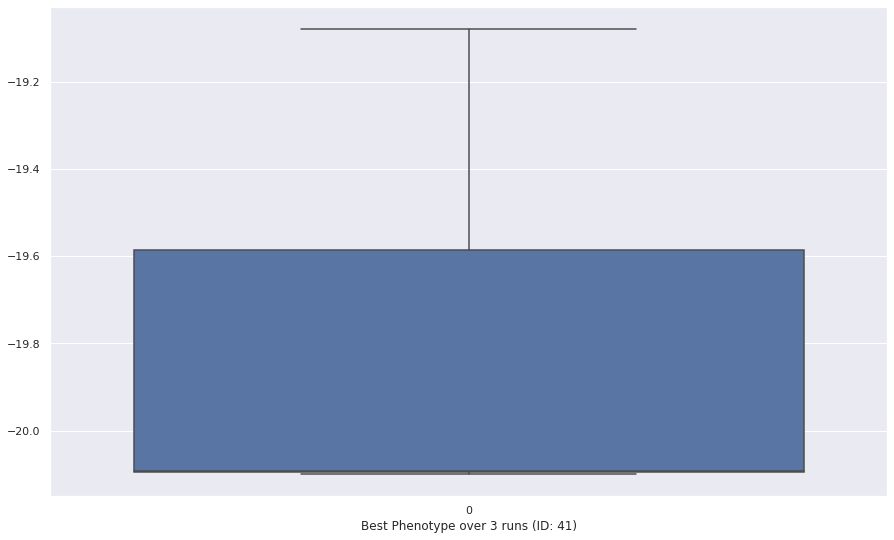

In [807]:
ax = sns.boxplot(data=best_pheno_df['Distance to Target'])
ax.set(xlabel='Best Phenotype over 3 runs (ID: 41)')
ax.figure.savefig('best_phenotype_41.png')